# Models and Applications

    Names of similar subjects:
- Management science.
- Decision science.
- Optimization method/algorithm.
- Mathematical programming


## Business Analytics
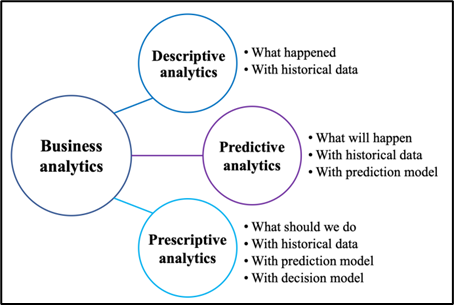
## Linear Programming - Basic Elements
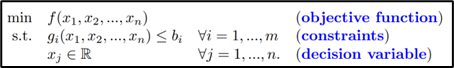
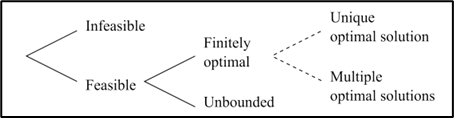

## Example 1: Producing Desks and Tables
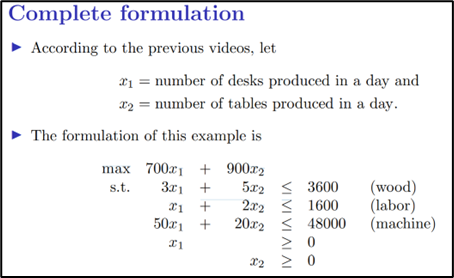

In [1]:
from pyomo.environ import *

# Create a concrete model
model = ConcreteModel()

# Define the variables
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)

# Define the objective function to maximize
model.profit = Objective(expr= 700*model.x1 + 900*model.x2, sense = maximize)

# Define the constraints
model.constraint_wood = Constraint(expr=3*model.x1 + 5*model.x2 <= 3600)
model.constraint_labor = Constraint(expr=model.x1 + 2*model.x2 <= 1600)
model.constraint_machine = Constraint(expr=50*model.x1 + 20*model.x2 <= 48000)

# Create a solver instance
solver = SolverFactory('glpk')  # You may need to install GLPK solver: `pip install glpk`

# Solve the problem
result = solver.solve(model)

# Check if the solver successfully found a solution
if result.solver.termination_condition.name == 'optimal':
    x1_optimal = model.x1()
    x2_optimal = model.x2()
    max_profit = model.profit()
    print(f"Number of desks produced (x1): {x1_optimal}")
    print(f"Number of tables produced (x2): {x2_optimal}")
    print(f"Maximum Profit: ${max_profit:.2f}")
else:
    print("Optimization failed. Check the feasibility of the problem.")


Number of desks produced (x1): 884.21052631579
Number of tables produced (x2): 189.473684210526
Maximum Profit: $789473.68


## Example 2: Personnel Scheduling
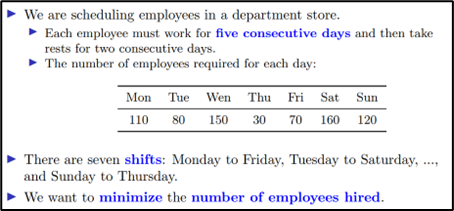
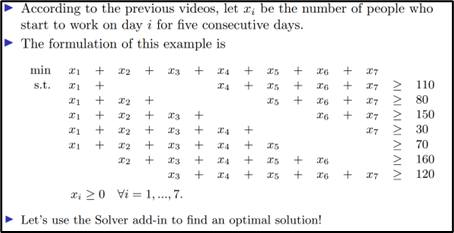

In [2]:
# Create a concrete model
model = ConcreteModel()

# Define the variables
model.x1 = Var(domain=NonNegativeReals)
model.x2 = Var(domain=NonNegativeReals)
model.x3 = Var(domain=NonNegativeReals)
model.x4 = Var(domain=NonNegativeReals)
model.x5 = Var(domain=NonNegativeReals)
model.x6 = Var(domain=NonNegativeReals)
model.x7 = Var(domain=NonNegativeReals)


# Define the objective function to maximize
model.employee = Objective(expr= model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 + model.x7 , 
                         sense = minimize)

# Define the constraints
model.constraint1 = Constraint(expr= model.x1 + model.x4 + model.x5 + model.x6 + model.x7 >= 110)
model.constraint2 = Constraint(expr= model.x1 + model.x2 + model.x5 + model.x6 + model.x7 >= 80)
model.constraint3 = Constraint(expr= model.x1 + model.x2 + model.x3 + model.x6 + model.x7 >= 150)
model.constraint4 = Constraint(expr= model.x1 + model.x2 + model.x3 + model.x4 + model.x7 >= 30)
model.constraint5 = Constraint(expr= model.x1 + model.x2 + model.x3 + model.x4 + model.x5 >= 70)
model.constraint6 = Constraint(expr= model.x2 + model.x3 + model.x4 + model.x5 + model.x6 >= 160)
model.constraint7 = Constraint(expr= model.x3 + model.x4 + model.x5 + model.x6 + model.x7 >= 120)



# Create a solver instance
solver = SolverFactory('glpk')  # You may need to install GLPK solver: `pip install glpk`

# Solve the problem
result = solver.solve(model)

# Check if the solver successfully found a solution
if result.solver.termination_condition.name == 'optimal':
    x1_optimal = model.x1()
    x2_optimal = model.x2()
    x3_optimal = model.x3()
    x4_optimal = model.x4()
    x5_optimal = model.x5()
    x6_optimal = model.x6()
    x7_optimal = model.x7()

    total_employee = model.employee()
    print(f"Number of employee on monday (x1): {x1_optimal}")
    print(f"Number of employee on Tuesday (x2): {x2_optimal}")
    print(f"Number of employee on Wednesday (x3): {x3_optimal}")
    print(f"Number of employee on Thursday (x4): {x5_optimal}")
    print(f"Number of employee on Friday (x5): {x5_optimal}")
    print(f"Number of employee on Saturday (x6): {x6_optimal}")
    print(f"Number of employee on Sunday (x7): {x7_optimal}")
    print(f"Maximum Profit: ${total_employee:.2f}")
else:
    print("Optimization failed. Check the feasibility of the problem.")


Number of employee on monday (x1): 3.33333333333333
Number of employee on Tuesday (x2): 40.0
Number of employee on Wednesday (x3): 13.3333333333333
Number of employee on Thursday (x4): 13.3333333333333
Number of employee on Friday (x5): 13.3333333333333
Number of employee on Saturday (x6): 93.3333333333333
Number of employee on Sunday (x7): 0.0
Maximum Profit: $163.33


## Integer Programming
### Requirement on selecting variables
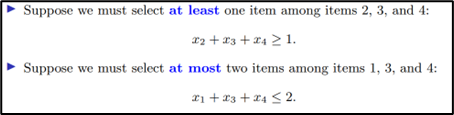
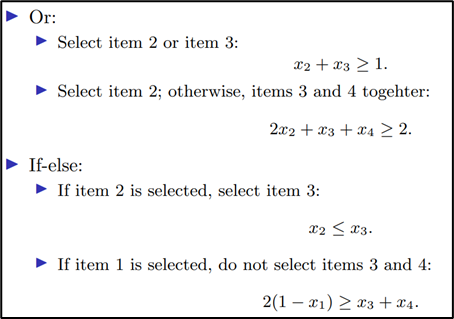
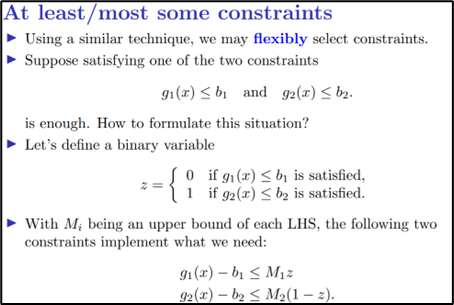
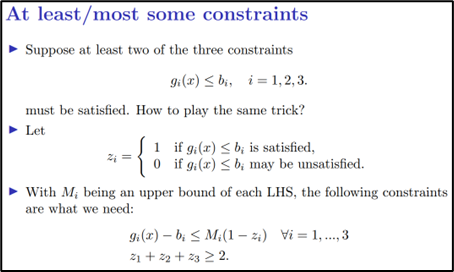

### Facility Location Problems
- Set covering problems: Build a minimum number of facilities to cover all demands.
- Maximum covering problems: Build a given number of facilities to cover as many demands as possible.
- Fixed charge location problems: Finding a balance between benefit of covering demands and cost of building facilities.

### Set covering problem
How to allocate as few facilities as possible to cover all demands?
- a<sub>ij</sub> = distance between facilities and demand
- x<sub>j</sub>  = no. of facility point

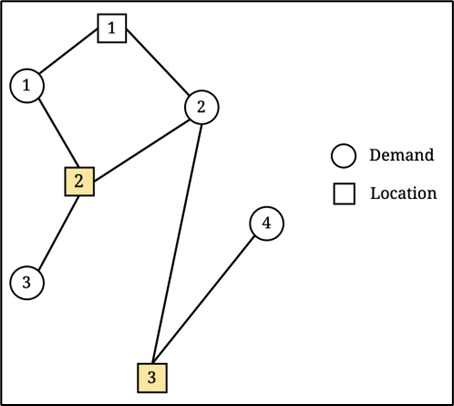 
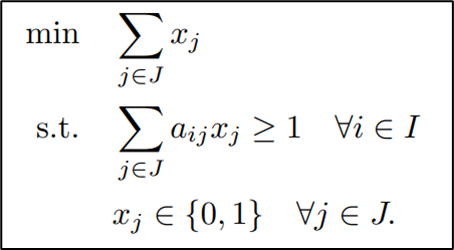


### Maximium covering problem
How to allocate at most facilities to cover as many demands as possible? 
- y<sub>i</sub>  = no. of demand points
- It's either 1 and 2 or 2 and 3
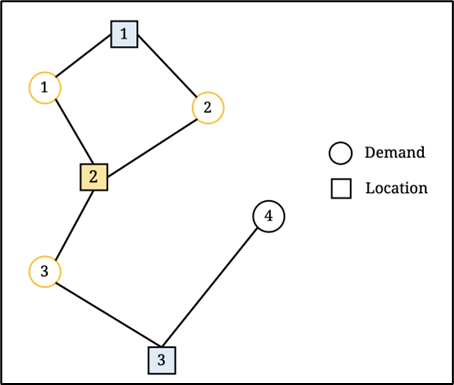
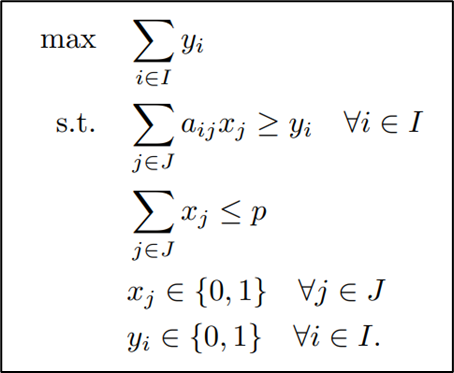


###  Fixed charge location problem
How to allocate some facilities to minimize the total shipping and construction costs?
- f<sub>i</sub>  = fixed construction cost
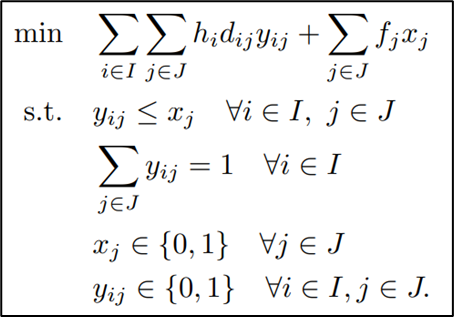
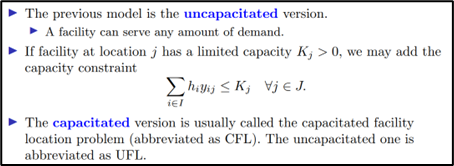

### How to approach problems?
When to use set covering?
- When we are required to take care of (almost) everyone.
- E.g., fire stations and police stations.

When to use maximum covering?
- When budgets are limited.
- E.g., cellular data networks.

When to use fixed charge location?
- When service costs depends on distances.
- E.g., distribution centers.

## Example 3: Facility Location
- f<sub>j</sub>  = weekly operating cost of distribution center j,
- c<sub>ij</sub> = shipping cost per book from distribution center j to region i,
- K<sub>j</sub> = capacity of distribution center j,
- D<sub>i</sub> = book demand of region i.


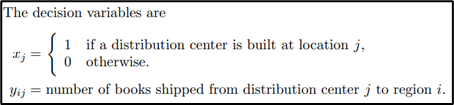
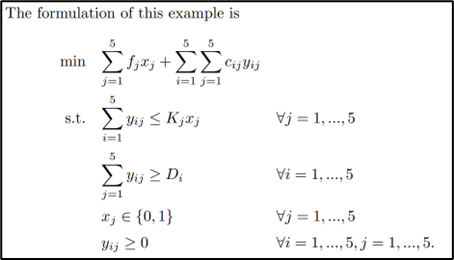

In [3]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, minimize, NonNegativeReals, Binary, SolverFactory

# Create a concrete model
model = ConcreteModel()

# Define the decision variables
model.x = Var(range(0, 5), domain=Binary)
model.y = Var(range(0, 5), range(0, 5), domain=NonNegativeReals)

# Define the parameters
demand = [8000, 12000, 9000, 14000, 17000]
operation_cost = [40000, 30000, 25000, 40000, 30000]
capacity = [20000, 20000, 15000, 25000, 15000]
shipping_cost = [
    [2.4, 3.25, 4.05, 5.25, 6.95],
    [3.5, 2.3, 3.25, 6.05, 5.85],
    [4.8, 3.4, 2.85, 4.3, 4.8],
    [6.8, 5.25, 4.3, 3.25, 2.1],
    [5.75, 6, 4.75, 2.75, 3.5]
]

# Define the objective function to minimize
def obj_expression(model):
    return (sum(operation_cost[j] * model.x[j] for j in range(0, 5)) + 
            sum(shipping_cost[i][j] * model.y[i, j] for i in range(0, 5) for j in range(0, 5)))

model.cost = Objective(rule=obj_expression, sense=minimize)

# Define the constraints
def constraint1_rule(model, j):
    return sum(model.y[i, j] for i in range(0, 5)) <= capacity[j] * model.x[j]

model.constraint1 = Constraint(range(0, 5), rule=constraint1_rule)

def constraint2_rule(model, i):
    return sum(model.y[i, j] for j in range(0, 5)) >= demand[i]

model.constraint2 = Constraint(range(0, 5), rule=constraint2_rule)

# Create a solver instance
solver = SolverFactory('glpk')

# Solve the problem
result = solver.solve(model)

# Check if the solver successfully found a solution
if result.solver.termination_condition.name == 'optimal':
    x = model.x
    y = model.y
    cost = model.cost()
    print("Optimal Solution:")
    print(f"x: {[value(x[j]) for j in range(0, 5)]}")
    print(f"y: {[value(y[i, j]) for i in range(0, 5) for j in range(0, 5)]}")
    print(f"Minimum Cost: {cost:.2f}")
else:
    print("Optimization failed. Check the feasibility of the problem.")


Optimal Solution:
x: [0.0, 1.0, 0.0, 1.0, 1.0]
y: [0.0, 8000.0, 0.0, 0.0, 0.0, 0.0, 12000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8000.0, 1000.0, 0.0, 0.0, 0.0, 0.0, 14000.0, 0.0, 0.0, 0.0, 17000.0, 0.0]
Minimum Cost: 268950.00


## Example 4: Nonlinear Programming

In [ ]:
conda install -c conda-forge ipopt